<a href="https://colab.research.google.com/github/ShubhamDeshmukh27/Yes-Bank-Stock-Price-Prediction/blob/main/Time_series_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement**

###Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

##**Data Description**

We've the YES BANK Stock price dataset which has the monthly stock prices of the bank since its inception. It contains the following features:

* **Date**: It denotes date of investment done (in our case we have month and year).
* **Open**: Open means the price at which a stock started trading when the opening bell rang.
* **High**: High refer to the maximum prices in a given time period.
* **Low**: Low refer to the minimum prices in a given time period.
* **Close**: Close refers to the price of an individual stock when the stock exchange closed for the day.

##**Objective of Project**

To determine the YES bank's stock’s future value on the national stock exchange. The advantage of a successful prediction of a stock's future price could results insignificant profit. The efficient-market hypothesis recommends that stock costs mirror all right now accessible data and any value changes that are not founded on recently uncovered data subsequently are an unpredictable.We have to build model which help us to predict the future stock prices.

##**Table of Contents**

####**Import**

In [448]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = (10, 6)
%matplotlib inline
import seaborn as sns
import pandas as pd 
from datetime import date, timedelta
import holidays
from calendar import monthrange
import plotly.express as px 

##Import libraries for Regressor
import math
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

In [449]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [450]:
# loading the csv data to a Pandas DataFrame
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yes Bank Stock Price prediction/data_YesBank_StockPrices.csv')

In [451]:
#let's look for top 5 rows 
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [452]:
#let's look for last 5 rows 
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [453]:
#number of rows and columns 
df.shape

(185, 5)

In [454]:
#information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [455]:
#Decription of dataset 
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Apr-13,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [456]:
#presence of null values in dataset.
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

##**Exploratory Data Analysis**

###**Data Cleaning**

The Given Date in data is of format MMM-YY is converted to proper date of YYYY-MM-DD and given date column has dtype as object converting it into datetime format.

In [457]:
# Importing datetime 
from datetime import datetime
# converting date to proper format of date
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [458]:
# setting date column as an index
df.set_index('Date',inplace=True)
df.index.freq = 'MS'

In [459]:
#Top  5 rows of dataset
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


##**Data Visulazation**

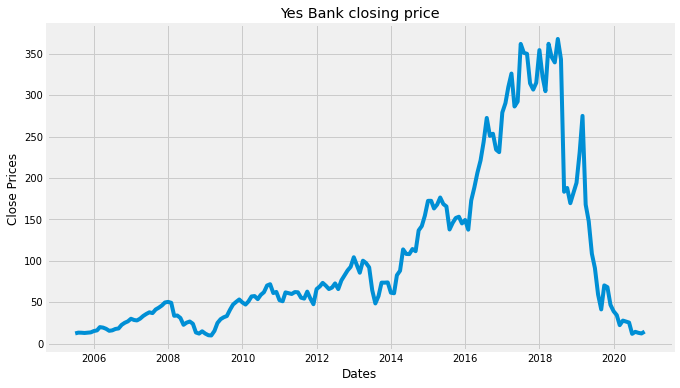

In [460]:
#plotting close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices ')
plt.plot(df['Close'])
plt.title('Yes Bank closing price')
plt.show()

####As we can see here the stock close price decreased after year 2018 the probably because of Rana Kapoor case and hitted the stock price heavily.

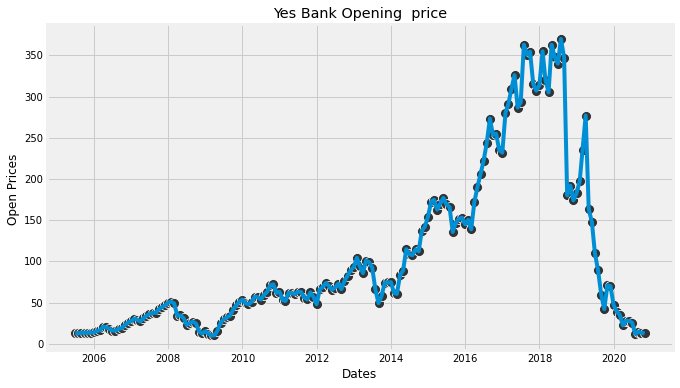

In [461]:
#plotting Open price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices ')
plt.plot(df['Open'])
plt.title('Yes Bank Opening  price')
sns.scatterplot(data=df, x="Date", y="Open", s=100, color=".2")

####Here we can see the same result as for Opening prices as closing prices.

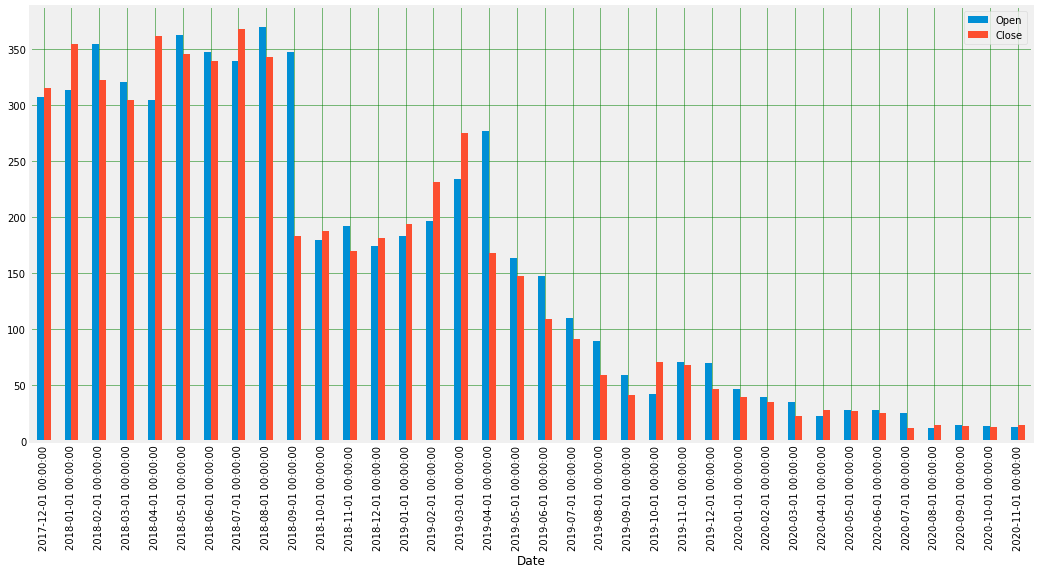

In [462]:
#Plot Open vs Close
df[['Open','Close']].tail(36).plot(kind='bar',figsize=(16,8))#Considering only last three year record
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

####As we can see here investing in yes bank stock was probably was not good idea beacause from year 2018 stock price given lowest returns to investors.

In [463]:
#Creating set of numerical features.
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

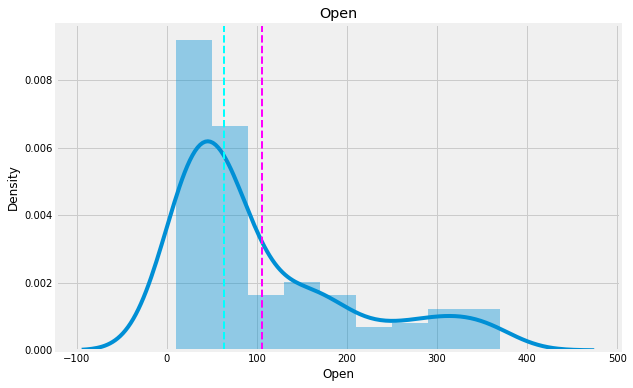

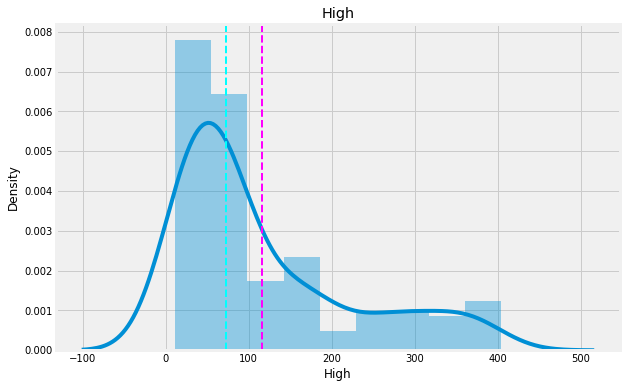

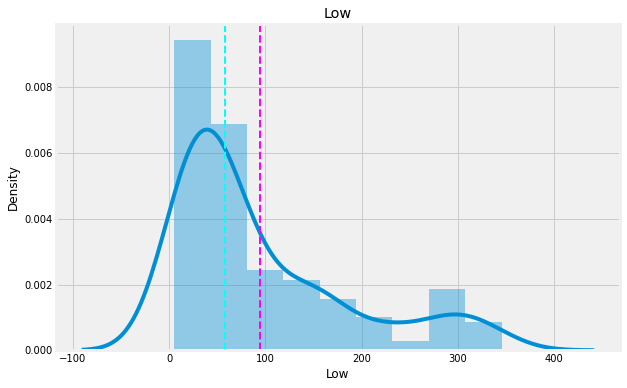

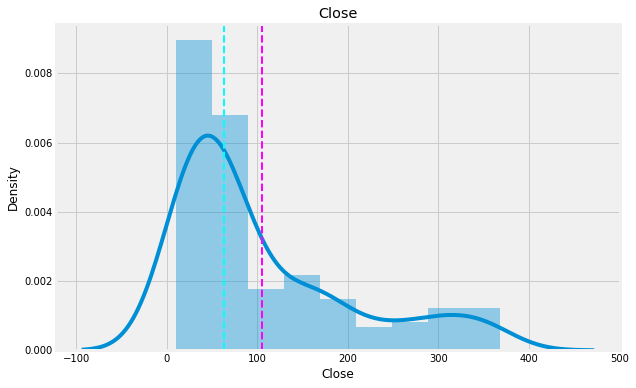

In [464]:
#plot a bar plot for each numerical feature count with Dist Plot
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

####As we can see here all histogram plot are right skewed. 

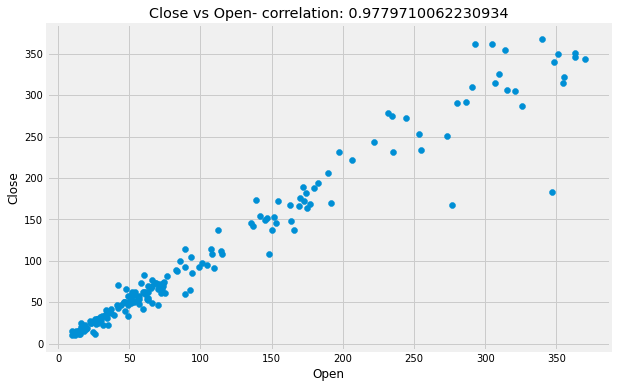

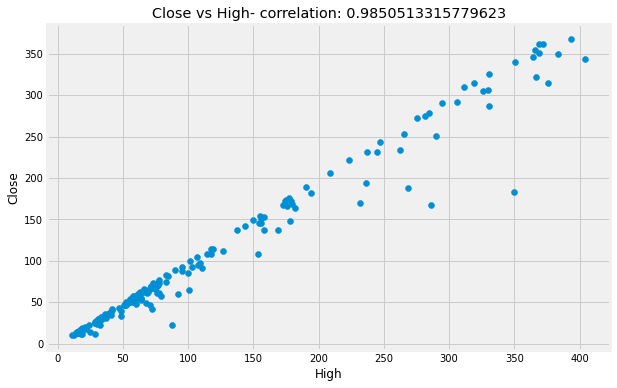

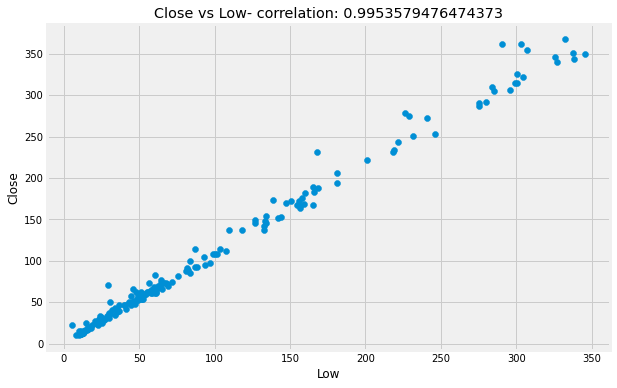

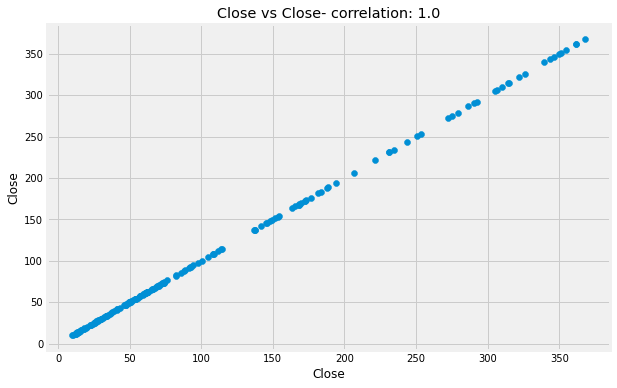

In [465]:
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=df[col]
  label=df['Close']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' +col +'- correlation: '+ str(correlation))

####Bivariate analysis showed high correlation of close price with other features.

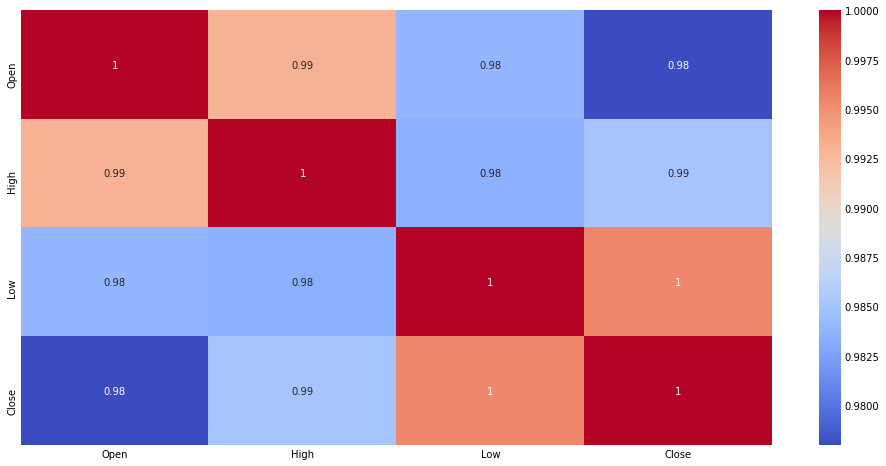

In [466]:
## Correlation
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

####Here, all variables shows the highest correlation among them .


##**Modelling**

####We will build three models 


1.   **Linear Regression**:- Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis.Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression.
2.   **Knn (Nearest neighbours) Regressor**:- KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood.
3.   **SVM**:-Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.



###Model Training and Testing

In [467]:
# x is independent variables and y is dependent variables
from scipy.stats import zscore
X =df.drop(columns=['Close']).apply(zscore)

In [468]:
#Dependent variabkle
y = np.log(df['Close'])

In [469]:
# Breaking off validation set or test set from training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=1)

In [470]:
#Looking for shapes of trainig and testing dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


In [471]:
#Applying linear regression model
lr_model=LinearRegression()
#Fitting linear regression model
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [472]:
#prediction 
y_pred=lr_model.predict(X_test)

In [473]:
#Applying Lasso Regression model
lasso  = Lasso(alpha=0.010 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [474]:
#Fitting lasso model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [475]:
# prediction for lasso model
y_pred_l = lasso.predict(X_test)

In [476]:
#performance metrics
print("MSE :",mean_squared_error(y_test, y_pred_l))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_l)))
print("MAE :",mean_absolute_error(y_test, y_pred_l))
print("R2 :",metrics.r2_score(y_test, y_pred_l))

MSE : 0.16979450921198339
RMSE : 0.41206129302809236
MAE : 0.35059764622064893
R2 : 0.8200828459676572


####Here applying lasso model we have R^2 value 82.00%.

####**Cross Validation** :- Basically Cross Validation is a technique using which Model is evaluated on the dataset on which it is not trained i.e. it can be a test data or can be another set as per availability or feasibility.

In [477]:
from sklearn.model_selection import GridSearchCV
### let's use  Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 5, 10, 20, 30, 40,
                                   45, 50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [478]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.18659534773694864


In [479]:
#prediction
y_pred_lasso = lasso_regressor.predict(X_test)

In [480]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",metrics.r2_score(y_test, y_pred_lasso))

MSE : 0.16979450921198339
RMSE : 0.41206129302809236
MAE : 0.35059764622064893
R2 : 0.8200828459676572


####Implementing the best parameters best R^2 score we have 82.00% for lasso regression model

In [481]:
#Implementing ridge regression model
from sklearn.linear_model import Ridge
ridge  = Ridge()

In [482]:
#Fitting the model
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [483]:
#Score 
ridge.score(X_train, y_train)

0.814278120922534

In [484]:
#Prediction
y_pred_r = ridge.predict(X_test)

In [485]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_r))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_r)))
print("MAE :",mean_absolute_error(y_test, y_pred_r))
print("R2 :",metrics.r2_score(y_test, y_pred_r))

MSE : 0.16978447744882538
RMSE : 0.4120491201893597
MAE : 0.3501850120549262
R2 : 0.8200934757947681


In [486]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,8,6,19,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 8, 6, 19, 20, 21, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [487]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -0.19213460468887036


In [488]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [489]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",metrics.r2_score(y_test, y_pred_ridge))

MSE : 0.17460972631724542
RMSE : 0.41786328663481004
MAE : 0.3541738283648222
R2 : 0.8149805599064218


####Implementing the best parameters best R^2 score we have 81.49% for Ridge regression model

###KNN model

In [490]:
#Let's apply the KNn regrssor model 
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors =2)
#fitting the model
knn_model=knn_regressor.fit(X_train,y_train)
#Prediction
y_knn_pred=knn_model.predict(X_test)

In [491]:
#K-Fold cross validation
knn_kfold = model_selection.KFold(n_splits=7, random_state=42)
results_kfold = model_selection.cross_val_score(knn_model, X_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  92.01159951159951


####Here we have accuracy for KNn regressor model is 92.01%.

###SVM model

In [492]:
#importing SVm model
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')#Linear
#Fitting the model
svm_model=svm_regressor.fit(X_train,y_train)
#prediction
y_svm_pred=svm_model.predict(X_test)

##**Evaluating**

In [374]:
# Function to run all model 
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)
        
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,2)
        df.loc[i,"MSE"]=round(MSE,2)
        df.loc[i,"RMSE"]=round(RMSE,2)
        df.loc[i,"MAPE"]=round(MAPE,2)
        df.loc[i,"Rsquare"]=round(Rsquare,2)
        
        i+=1
    
    #Sorting values by accuracy
    df.sort_values(by=['MAPE'],ascending=True,inplace=True)
    
    return df

In [375]:
#Three models 
models=[lr_model,knn_regressor,svm_regressor]

In [376]:
#Testing performance
report=score_model(X_train,y_train,X_test,y_test)
report

,Model_Name,MAE,MSE,RMSE,MAPE,Rsquare
1,KNeighborsRegressor,0.06,0.01,0.09,1.82,0.99
0,LinearRegression,0.35,0.17,0.41,9.54,0.82
2,SVR,0.33,0.20,0.45,9.87,0.79


Observation from above table:
* **KNeighborsRegressor** gives lowest MAE, MSE, RMSE, MAPE and best R^2 value.

* Overall we can say that KNeighborsRegressor is the best model among all regression model which gives around 92.00% accuracy of predicting stock price of our dataset.

In [377]:
#prediction
y_pred_2 = knn_regressor.predict(X_test)
y_pred_1=lr_model.predict(X_test)
y_pred_3=svm_model.predict(X_test)

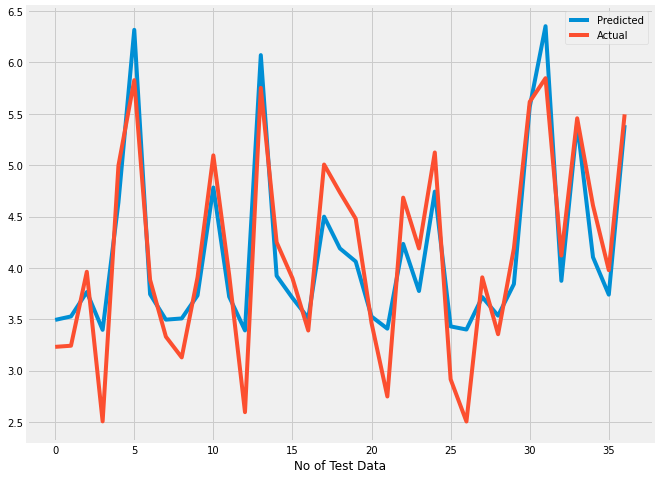

In [378]:
#Linear regression model performance visualization
plt.figure(figsize=(10,8))
plt.plot(y_pred_1)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

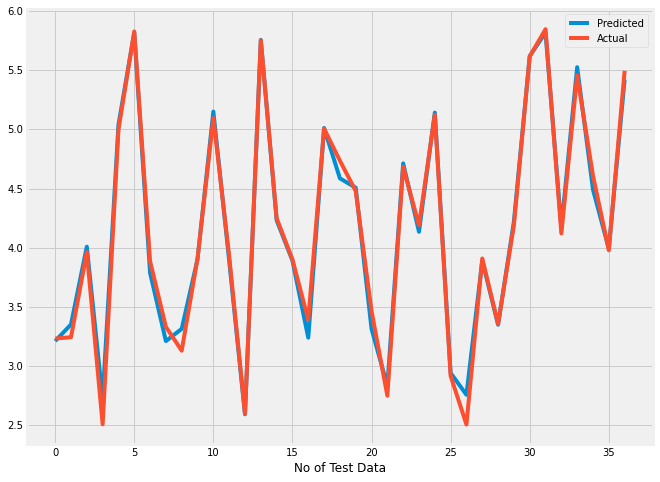

In [379]:
#Knn regerssor performance visulazation
plt.figure(figsize=(10,8))
plt.plot(y_pred_2)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

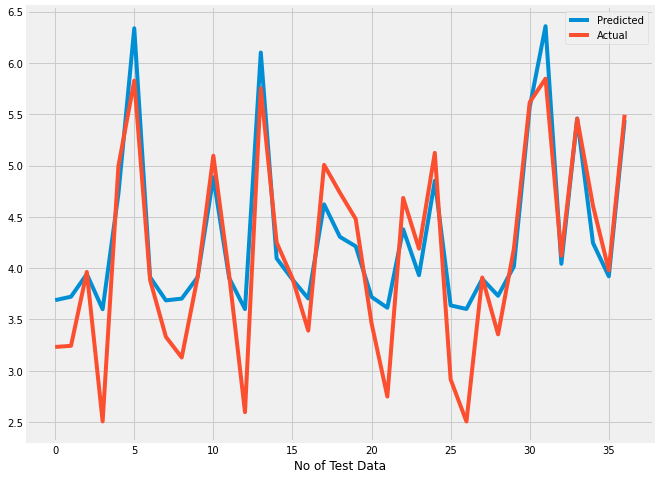

In [380]:
#Svm Regressor performance visulaztion
plt.figure(figsize=(10,8))
plt.plot(y_pred_3)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##**ARIMA**

####So what exactly is an ARIMA model?

####ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

In [166]:
#Installing 'pmdarima'
!pip install pmdarima

##ADF Test

In [381]:
# Dropping the columns 
new_df = df.drop(['Open','High','Low'],axis=1)

In [382]:
new_df.head()

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42
2005-09-01,13.30
2005-10-01,12.99
2005-11-01,13.41


In [383]:
new_df = np.log(new_df)

We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

In [384]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

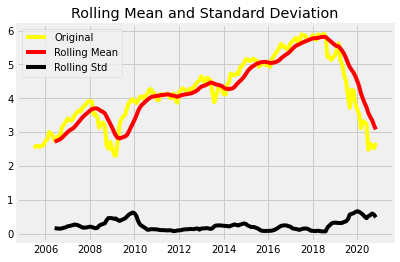

Results of dickey fuller test
Test Statistics                 -1.433268
p-value                          0.566227
No. of lags used                 1.000000
Number of observations used    183.000000
critical value (1%)             -3.466598
critical value (5%)             -2.877467
critical value (10%)            -2.575260
dtype: float64


In [385]:
test_stationarity(new_df['Close'])


####Here we can see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

####In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

####So let us separate Trend and Seasonality from the time series.

### Stationarity

Subtract the previous value from the current value. Now if we just difference once, we might not get a stationary series so we might need to do that multiple times. 

And the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model. 

An ARIMA model is characterized by 3 terms (p, d, q):

- p is the order of the AR term

- d is the number of differencing required to make the time series stationary

- q is the order of the MA term

As we see in the parameters required by the model, any stationary time series can be modeled with ARIMA models.


In [ ]:
# Check if price series is stationary
#from statsmodels.tsa.stattools import adfuller

#result = adfuller(new_df.Close.dropna())
#print(f"ADF Statistic: {result[0]}")
#print(f"p-value: {result[1]}")

##**Autocorrelation Fuction**

In [388]:
from statsmodels.graphics.tsaplots import plot_acf

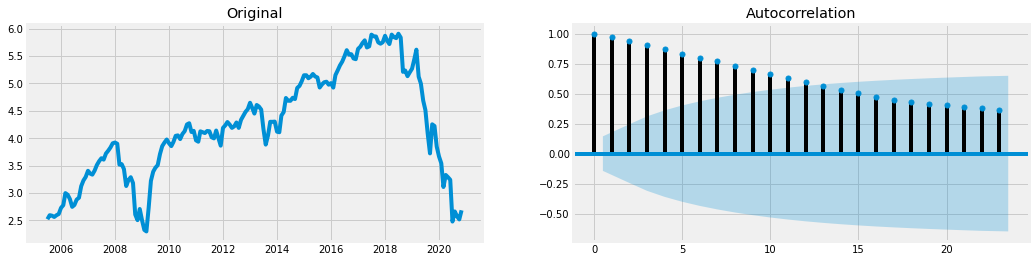

In [389]:
#Original series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(new_df.Close)
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(new_df.Close, ax=ax2);

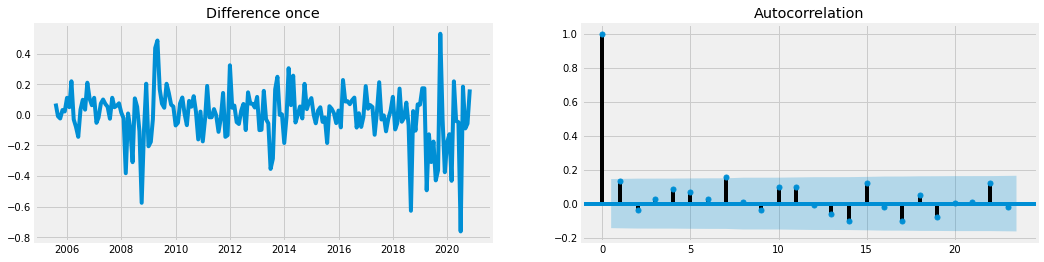

In [390]:
#Difference once 
diff = new_df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

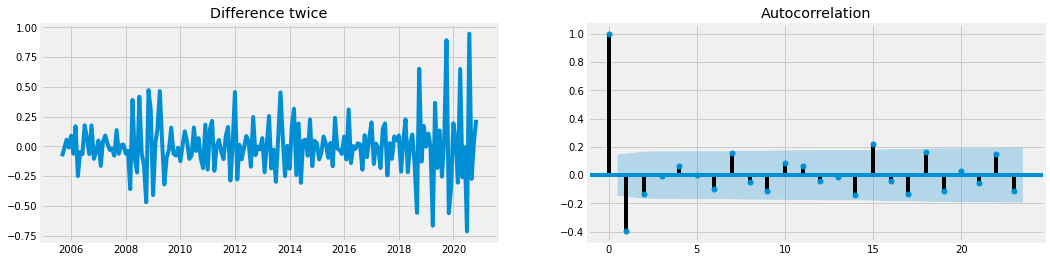

In [391]:
#Difference twice
diff =new_df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);

We can use the pmdarima package to get the number of differencing.

In [392]:
!pip install pmdarima

In [393]:
from pmdarima.arima import auto_arima
from pmdarima.arima.utils import ndiffs
ndiffs(df.Close, test="adf")

1

#### p

p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors. 

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags. 

In [394]:
from statsmodels.graphics.tsaplots import plot_pacf

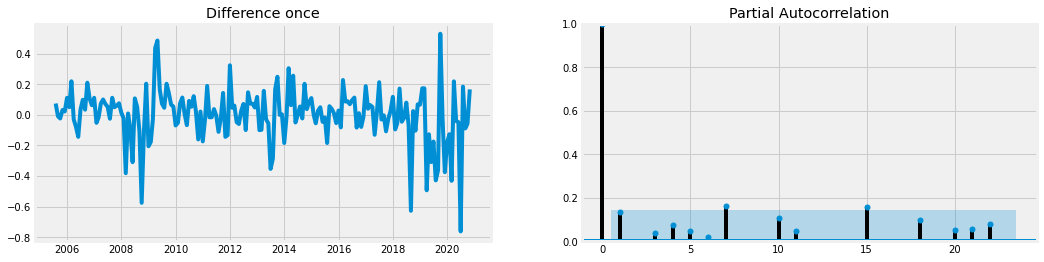

In [395]:
diff = new_df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

We can observe that the PACF lag 6 is significant as it's above the significance line.

#### q

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

We can look at the ACF plot for the number of MA terms.

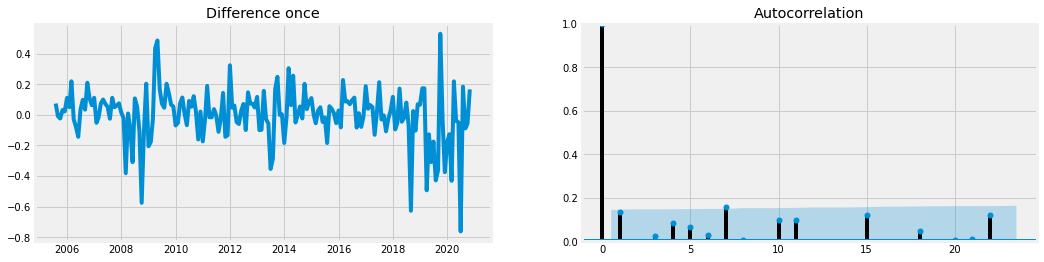

In [396]:
diff = new_df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [397]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA Model
model = ARIMA(new_df.Close, order=(6,1, 6))
result = model.fit(disp=-1)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  184
Model:                 ARIMA(6, 1, 6)   Log Likelihood                  71.391
Method:                       css-mle   S.D. of innovations              0.162
Date:                Thu, 05 Aug 2021   AIC                           -114.782
Time:                        05:36:45   BIC                            -69.772
Sample:                    08-01-2005   HQIC                           -96.539
                         - 11-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0013      0.011      0.112      0.910      -0.021       0.023
ar.L1.D.Close     0.5286      0.081      6.521      0.000       0.370       0.687
ar.L2.D.Close     0.6097      0.124     

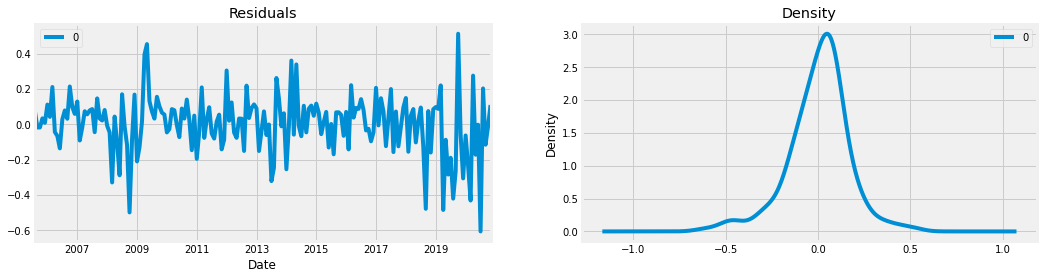

In [398]:
# Plot residual errors
residual = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2,figsize=(16,4))
residual.plot(title="Residuals", ax=ax[0])
residual.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

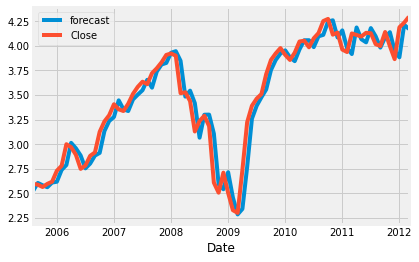

In [399]:
# Actual vs Fitted
result.plot_predict(
    start=1,
    end=80,
    dynamic=False);

We set "dynamic=False" the in-sample lagged values are used for prediction.
That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good.

####Optimal ARIMA model manually using Out-of-Time Cross validation

####In Out-of-Time cross-validation, we take few steps back in time and forecast into the future to as many steps we took back. Then we compare the forecast against the actuals.To do out-of-time cross-validation, we need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 70:30 ratio or a reasonable proportion based on time frequency of series.

129
56


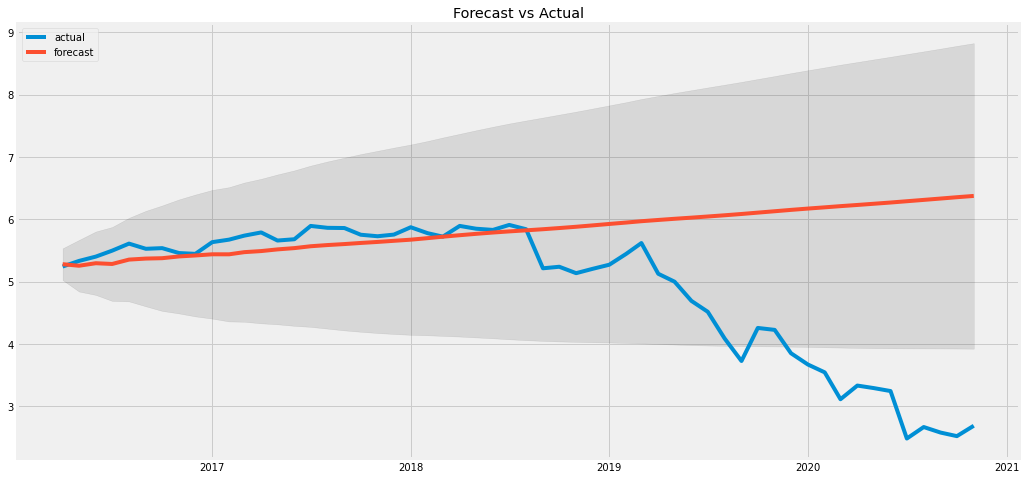

In [400]:
#Splitting into train-Test 
n = int(len(new_df) * 0.70)
train = new_df.Close[:n]
test = new_df.Close[n:]
print(len(train))
print(len(test))

#Considering the future 56 months
step =56
model = ARIMA(train, order=(6, 1, 6))
result = model.fit(disp=-1)

# Forecast
fc, se, conf = result.forecast(step)
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)
#Plotiing the result 
plt.figure(figsize=(16, 8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

From the chart, the ARIMA(6,1,6) model seems to give a directionally correct forecast.That seems fine.
But each of the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve. So, there is definitely scope for improvement.
So, what I am going to do is to increase the order of differencing to zero, that is set d=0 and iteratively increase p to up to 6 and then q up to 5.

129
56


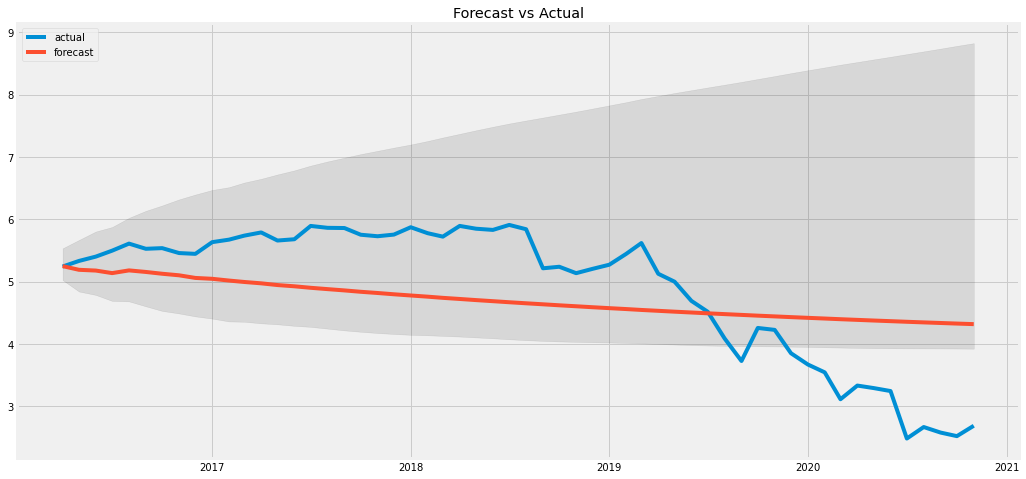

In [401]:
#Splitting into train-Test 
n = int(len(new_df) * 0.70)
train = new_df.Close[:n]
test = new_df.Close[n:]
print(len(train))
print(len(test))

#Considering the future 56 months
step =56
new_model = ARIMA(train, order=(6, 0, 5))
new_result = new_model.fit(disp=-1)

# Forecast
fc2, se2, conf2 = new_result.forecast(step)
fc2 = pd.Series(fc2, index=test[:step].index)
lower2 = pd.Series(conf[:, 0], index=test[:step].index)
upper2 = pd.Series(conf[:, 1], index=test[:step].index)
#Plotiing the result 
plt.figure(figsize=(16, 8))
plt.plot(test[:step], label="actual")
plt.plot(fc2, label="forecast")
plt.fill_between(lower2.index, lower2, upper2, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

In [402]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(test, fc2)

{'corr': 0.7370254134928292,
 'mae': 0.8038407954019161,
 'mape': 0.1741228551226052,
 'me': 0.1955643978890437,
 'minmax': 0.15823646827377502,
 'mpe': 0.03489344569145076,
 'rmse': 0.9170913846121032}

In [403]:
# Accuracy
errors = abs(fc2 - test)
mape = 100 * (errors / test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 80.8 %.


####Here we can see that around 17.41% MAPE(Mean Absolute Percentage Error) implies the model is about 81 % accurate in predicting the test set observations.

# **Forecasting Timeseries Data Using Facebook FbProphet**

####What is FbProphet?

####*Facebook* Prophet is an open-source forecasting method implemented in Python.It provides automated forecasts. Prophet is used in many applications relating to time series data and to gather sample time forecast data. In the case of such models, getting exact future data is never possible, but we can somehow get the future trend.

The input to Prophet is always a dataframe with two columns: **ds and y**

 The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The **y** column must be numeric, and represents the measurement we wish to forecast.

**Steps Required With FbProphet:**
* Installing fbprophet
* Data Preprocessing With Time Seires
* Model Fitting
* Obtaining The Forecasts
* Plotting The Forecasts
* Cross Validation
* Computing Performance Metrics
* Visualize the Performance MEtrics
* Conclusions

In [493]:
#importing 
import fbprophet

In [494]:
#prit top 5 rows
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


Only two features are needed from the dataset that is Date and Close Prices. So let’s prepare the data for our model:

In [495]:
#Resetting the index
df.reset_index('Date',inplace=True)

In [496]:
df.rename(columns={'Date':'ds','Close':'y'},inplace=True)

In [497]:
stock_df=df[['ds', 'y']].copy()

In [498]:
stock_df.head()

,ds,y
0,2005-07-01,12.46
1,2005-08-01,13.42
2,2005-09-01,13.30
3,2005-10-01,12.99
4,2005-11-01,13.41


In [499]:
# Importing FBPROPHET
from fbprophet import Prophet

Now we will fit the model by instantiating a new Prophet object.Then we call its fit method and pass in the historical dataframe and the predictions are made on a dataframe with a column ds containing the dates for which a prediction is to be made so We can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe.

Prophet has default fit weekly and yearly seasonalities in our case we have added the seasonality as monthly. seasonality has low uncertainty at the start of each month where there are data points, but has very high posterior variance in between. When fitting Prophet to monthly data, only make monthly forecasts, which can be done by passing the frequency into make_future_dataframe:

In [564]:
### intiialize the Model
model = Prophet()
model.fit(stock_df)# fit the model using all data
future = model.make_future_dataframe(periods=60, freq='MS') # 'MS' used here is month-start, means the data point is placed on the start of each month.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Here, we make the future dataframe of 5 years, that's why we've provided the period as 60 months.We have successfully fit the data to the Facebook Prophet model. Now let’s have a look at the stock price prediction made by the model:

The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


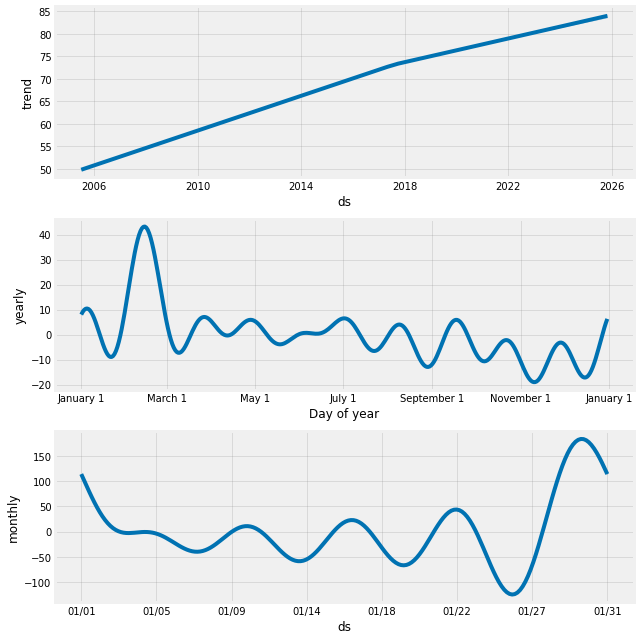

In [565]:
model = Prophet(weekly_seasonality=False)# the Prophet class (model)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5) # Adding seasonality as monthly, because we require the monthly prediction  
forecast = model.fit(stock_df).predict(future)# fit the model using all data and predicting future
# Let's plot the components of our model
model.plot_components(forecast);

From above we can see that the trend is increasing and when we look at yearly plot it reaches at peak value before march probably reason for that march ending. (financial year end of India.)  

In [566]:
# Let's see the components of our model
model.component_modes

{'additive': ['monthly',
  'yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [567]:
future.tail()

,ds
240,2025-07-01
241,2025-08-01
242,2025-09-01
243,2025-10-01
244,2025-11-01


We have data upto 2025-11-01.

In [568]:
### Prediction on future data
prediction=model.predict(future)

In [569]:
#print top 5 rows
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-07-01,49.831499,-52.657888,85.761688,49.831499,49.831499,-31.982298,-31.982298,-31.982298,-38.463627,-38.463627,-38.463627,6.481329,6.481329,6.481329,0.0,0.0,0.0,17.849201
1,2005-08-01,49.995517,-61.935149,96.303135,49.995517,49.995517,-32.134399,-32.134399,-32.134399,-31.377087,-31.377087,-31.377087,-0.757312,-0.757312,-0.757312,0.0,0.0,0.0,17.861119
2,2005-09-01,50.159536,-57.007486,95.108897,50.159536,50.159536,-31.143799,-31.143799,-31.143799,-19.441884,-19.441884,-19.441884,-11.701915,-11.701915,-11.701915,0.0,0.0,0.0,19.015736
3,2005-10-01,50.318263,-62.533992,87.374923,50.318263,50.318263,-38.755794,-38.755794,-38.755794,-31.377087,-31.377087,-31.377087,-7.378707,-7.378707,-7.378707,0.0,0.0,0.0,11.562470
4,2005-11-01,50.482282,-57.380624,95.818872,50.482282,50.482282,-30.069317,-30.069317,-30.069317,-19.441884,-19.441884,-19.441884,-10.627433,-10.627433,-10.627433,0.0,0.0,0.0,20.412965


In [570]:
#considering only those columns which are required for further process
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2005-07-01,17.849201,-52.657888,85.761688
1,2005-08-01,17.861119,-61.935149,96.303135
2,2005-09-01,19.015736,-57.007486,95.108897
3,2005-10-01,11.562470,-62.533992,87.374923
4,2005-11-01,20.412965,-57.380624,95.818872


In [571]:
#Here yhat is mean of yhat lower and yhat upper 
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
240,2025-07-01,113.635043,33.858076,189.514846
241,2025-08-01,74.930744,-2.155053,152.410566
242,2025-09-01,24.849136,-51.220602,96.488910
243,2025-10-01,68.528607,-2.756410,145.057735
244,2025-11-01,26.142876,-43.666077,103.396370


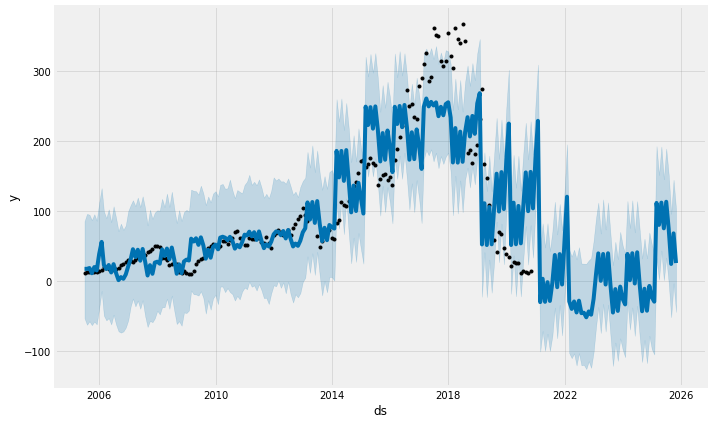

In [572]:
#### plot the predicted projection
model.plot(prediction);

####Here we can see that our model predicted overall well as most predicted values lie in confidence interval.

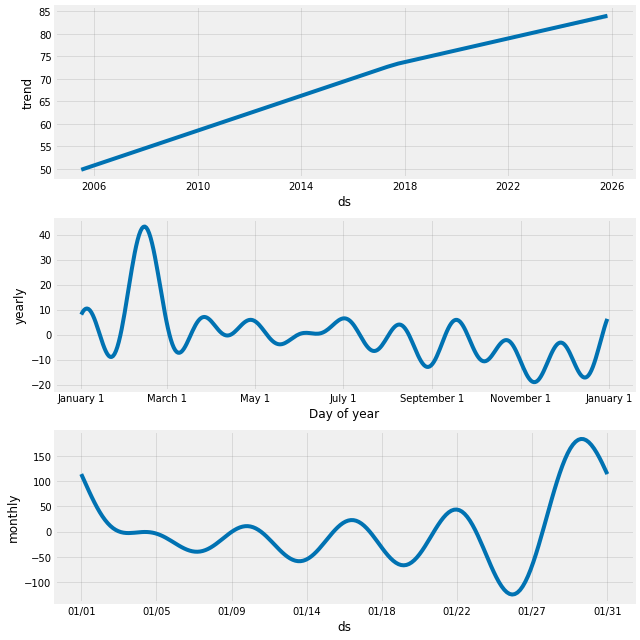

In [573]:
## Visualize Each Components[Trends,Weekly]
model.plot_components(prediction);

Here we can see our prediction yearly wise,monthly wise and trend of the stock prices.

##**Cross validation**

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

This cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period). By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.

In [574]:
from fbprophet.diagnostics import cross_validation

We will consider horizon for 1 year and initial 3 years data.

In [575]:
crv_df=cross_validation(model,horizon="365 days",period='180 days',initial='1096 days')

INFO:fbprophet:Making 24 forecasts with cutoffs between 2008-07-02 00:00:00 and 2019-11-02 00:00:00


In [576]:
crv_df.shape

(288, 6)

The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of yhat vs. y.

In [577]:
crv_df.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2008-08-01,40.245191,39.103314,41.445295,26.83,2008-07-02
1,2008-09-01,41.067000,39.807192,42.369456,24.13,2008-07-02
2,2008-10-01,40.789432,39.589725,41.973872,13.58,2008-07-02
3,2008-11-01,42.973994,41.705581,44.164690,12.26,2008-07-02
4,2008-12-01,40.762470,39.481727,42.111385,15.03,2008-07-02


In [578]:
crv_df.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
283,2020-07-01,129.299625,63.329915,188.780307,11.95,2019-11-02
284,2020-08-01,182.016747,118.124125,247.780416,14.37,2019-11-02
285,2020-09-01,224.775941,162.868088,283.493762,13.15,2019-11-02
286,2020-10-01,174.543406,114.327933,234.682036,12.42,2019-11-02
287,2020-11-01,225.362603,161.615313,285.449544,14.67,2019-11-02


In [579]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(crv_df)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,35 days,2909.646693,53.941141,32.995170,0.445647,0.209830,0.428571
1,39 days,2827.846854,53.177503,31.325250,0.381288,0.154778,0.464286
2,40 days,2823.260689,53.134364,31.181460,0.369197,0.154778,0.464286
3,41 days,3005.183478,54.819554,33.352355,0.377365,0.183549,0.428571
4,44 days,3002.675408,54.796673,33.301062,0.380515,0.207394,0.392857


In [580]:
# Importing plot_cross_validation_metric for plotting matrics
from fbprophet.plot import plot_cross_validation_metric

Text(0.5, 1.0, 'Mean Absolute Percentage Error')

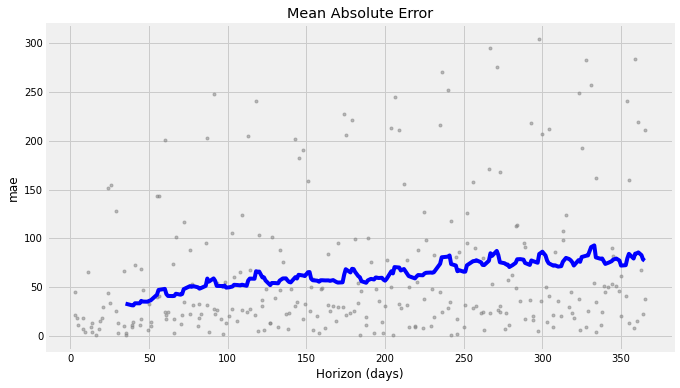

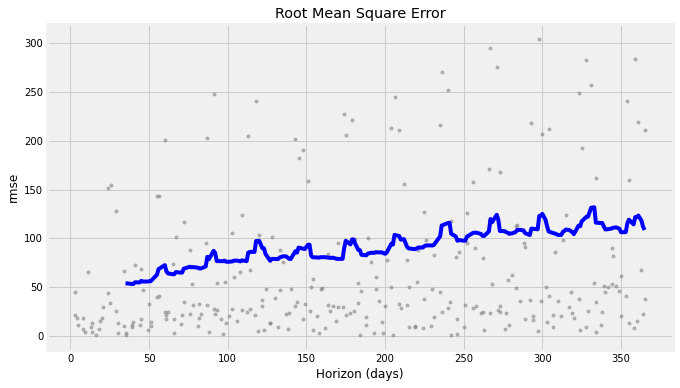

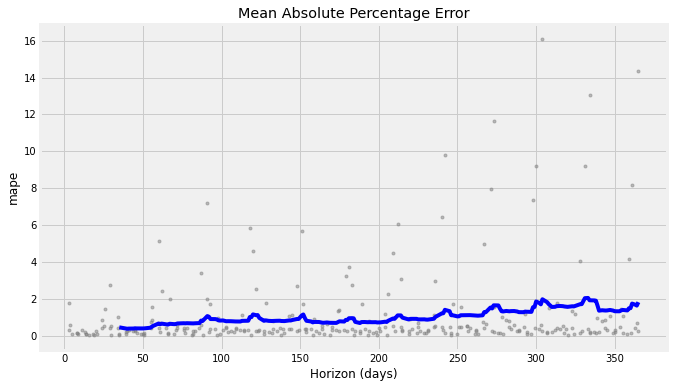

In [581]:
# plot MAE (Mean Absolute Error)
fig=plot_cross_validation_metric(crv_df,metric='mae')
plt.title('Mean Absolute Error')
# plot MAE (Root Mean Square Error)
fig=plot_cross_validation_metric(crv_df,metric='rmse')
plt.title('Root Mean Square Error')
# plot MAE (Mean Absolute Percentage Error)
fig=plot_cross_validation_metric(crv_df,metric='mape')
plt.title('Mean Absolute Percentage Error')

#### Here as shown for MAPE(Mean Absolute Percentage Error). Dots show the absolute percent error for each prediction in crv_df. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots.

####We see for this forecast that errors around 2.5% are typical for predictions one month into the future, and that errors increase up to around 18-19% for predictions that are a year out.

##**Conclusion**



* In EDA part we observed that
  * 1) There is increase in trend of Yes Bank's stock's Close price till 2018 an then sudden decrease.
  * 2)There is increase in trend of Yes Bank's stock's Open price till 2018 an then sudden decrease.
  * 3)We observed that open vs close price graph concluded that after 2018 yes bank's stock hitted drastically.
* We implemented three regressor
  * 1)KNN regressor with highest accuracy - 92.00%
  * 2)linear regression accuracy - 82.00%
  * 3)SVM regressor acccuracy - 79.00% 
* We implemnted the ARIMA model and we got accuracy about 81.00%.
* We used timeseries approach for the FBprophet forcast the error of 2.5% are typical for predictions one month into the future, and that errors increase up to around 18-19% for predictions that are a year out. 
* Fbprophet is the best performing time series model in terms of accuracy.





